# WOHOO Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

# Set seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [2]:
# File mapping for clarity
files = {
    "ADVERSARY_biased": "inference/ADVERSARY_biased.csv",
    "LR_balanced": "inference/LR_balanced.csv",
    "LR_biased": "inference/LR_biased.csv",
    "LR_SMOTE": "inference/LR_SMOTE.csv",
    "RF_balanced": "inference/RF_balanced.csv",
    "RF_biased": "inference/RF_biased.csv",
    "RF_SMOTE": "inference/RF_SMOTE.csv",
}

In [3]:
# Initialize a DataFrame to store metrics
metrics_list = []

# Helper function for FNR
def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp) if (fn + tp) > 0 else np.nan

# Load CSVs and compute metrics
for model_name, path in files.items():
    df = pd.read_csv(path)
    for race in df['race'].unique():
        sub = df[df['race'] == race]
        y_true = sub['True_Label']
        y_pred = sub['Predicted_Label']
        metrics_list.append({
            "Model": model_name,
            "Race": race,
            "F1": f1_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred),
            "Recall": recall_score(y_true, y_pred),
            "FNR": fnr(y_true, y_pred),
        })

metrics_df = pd.DataFrame(metrics_list)

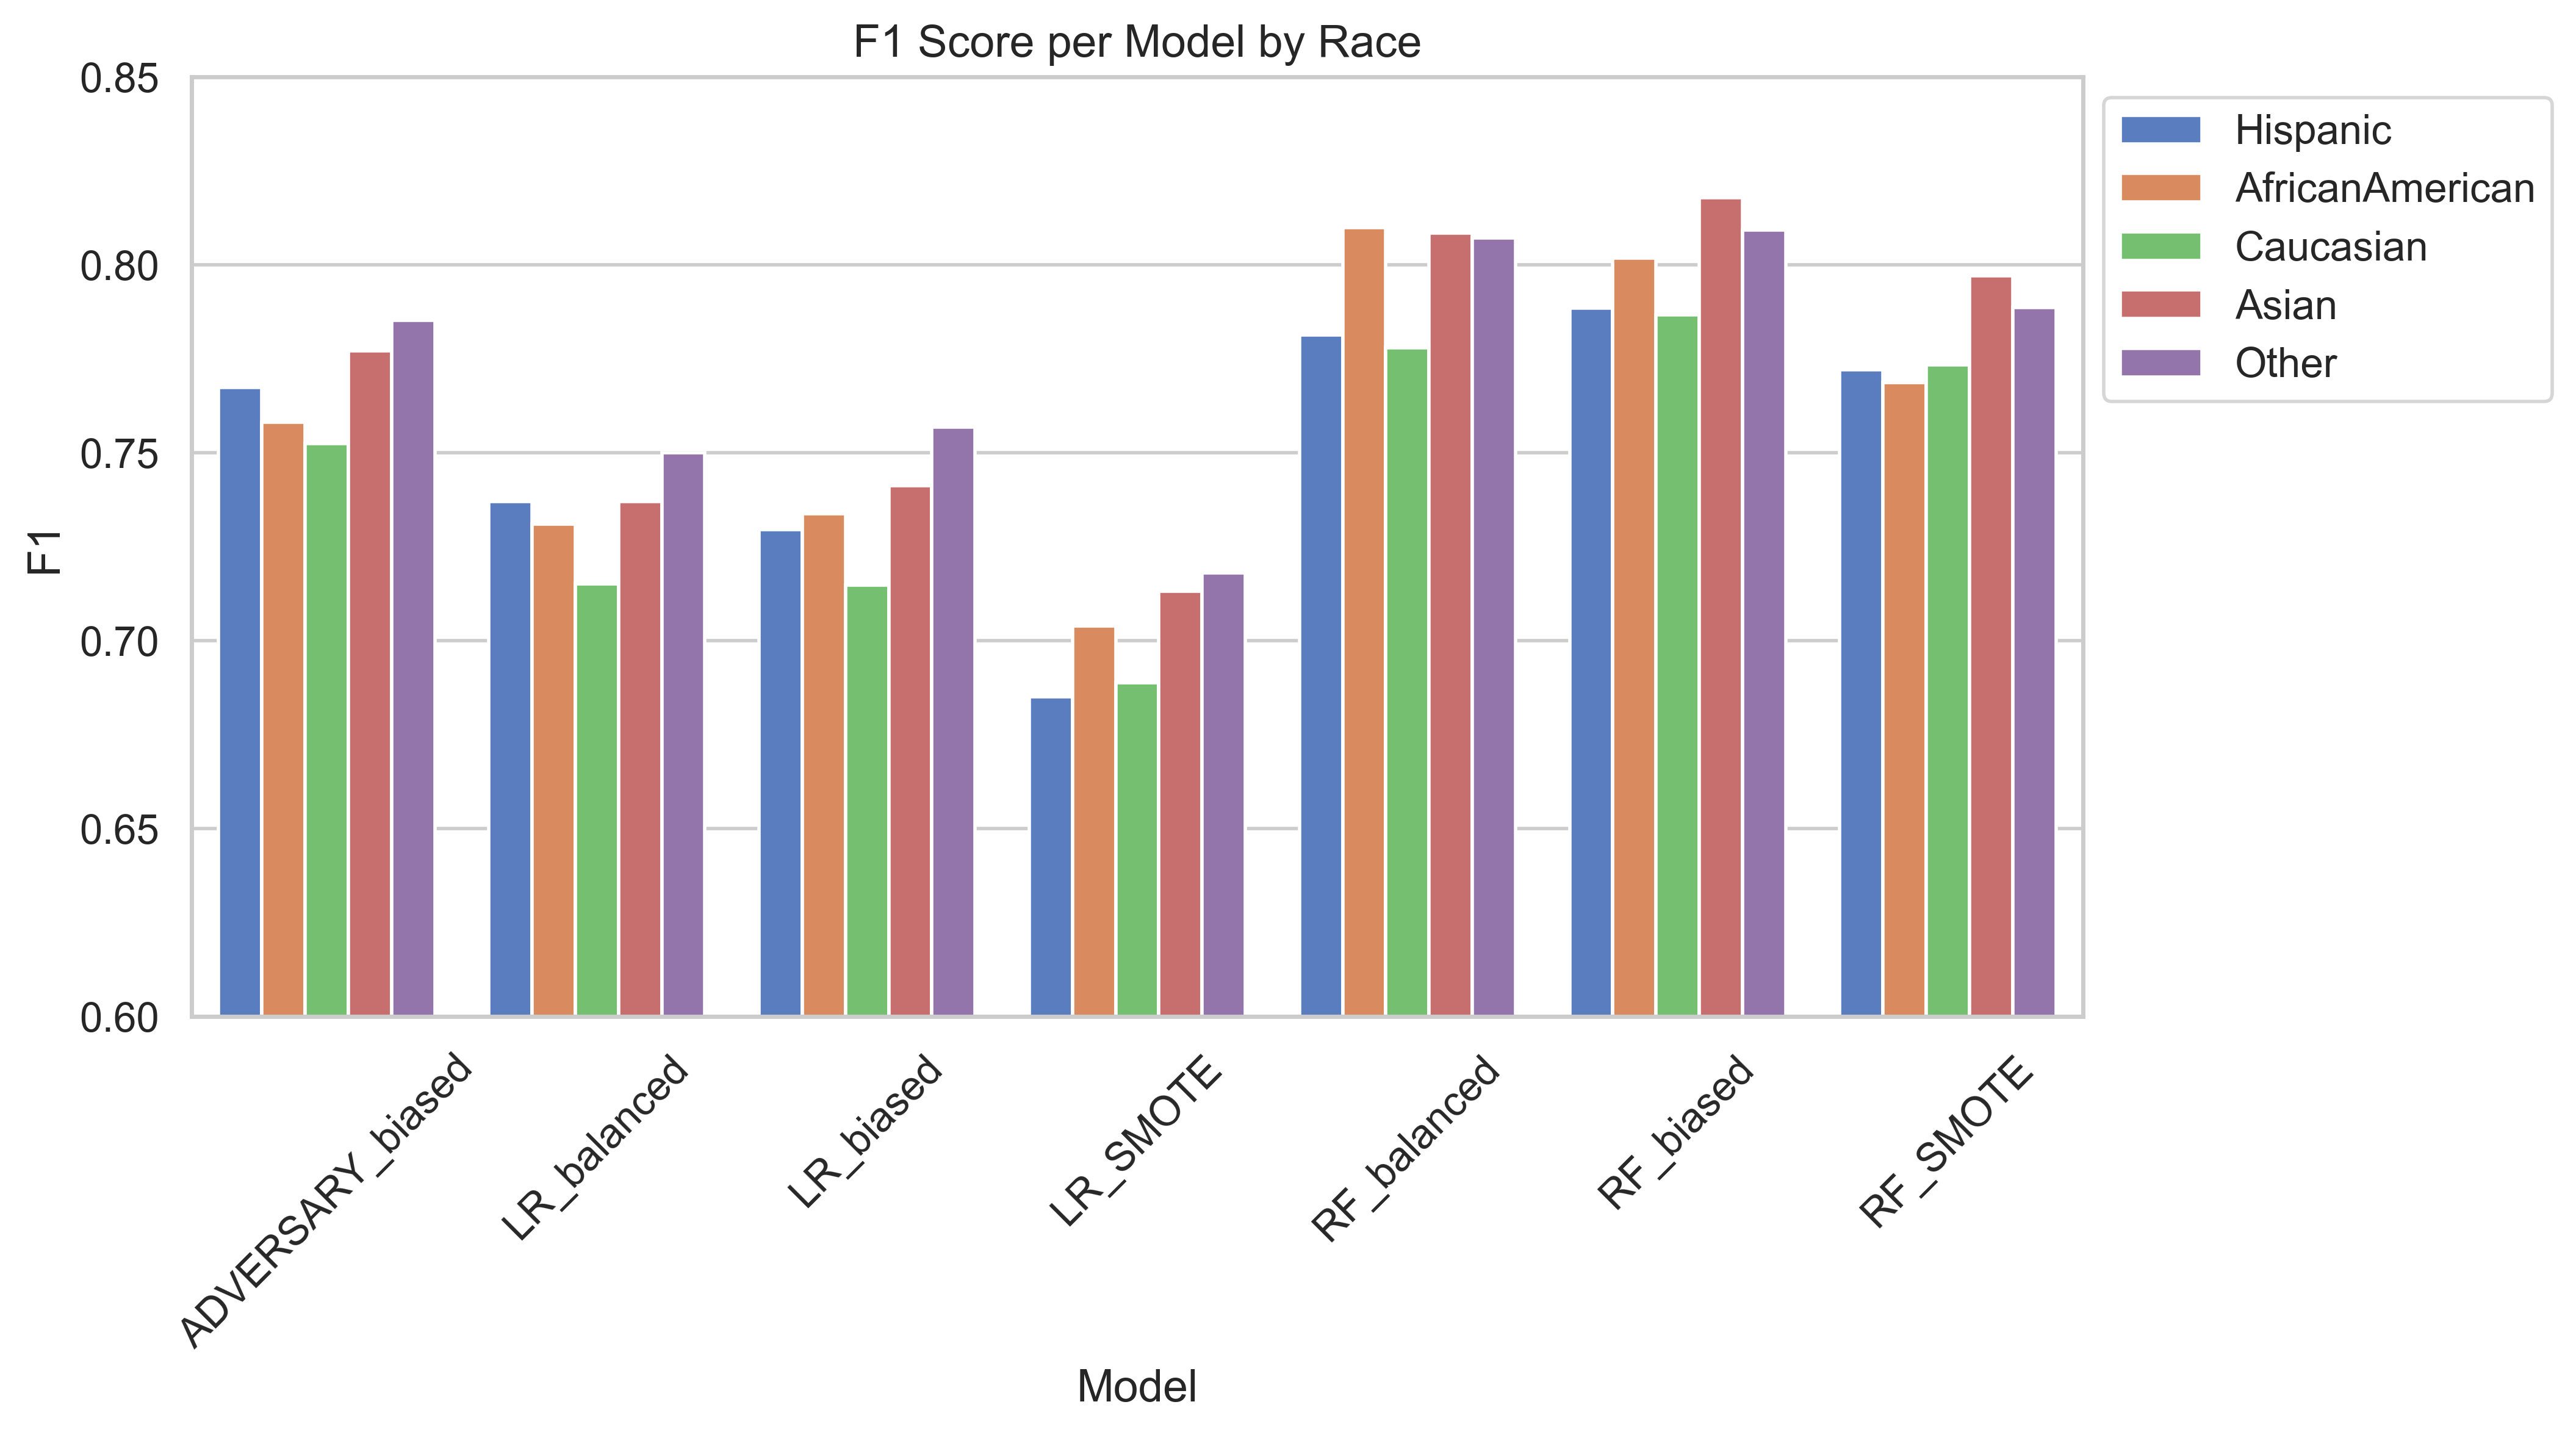

In [20]:
# 1. F1 Scores
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="F1", hue="Race")
plt.title("F1 Score per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.6,0.85)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

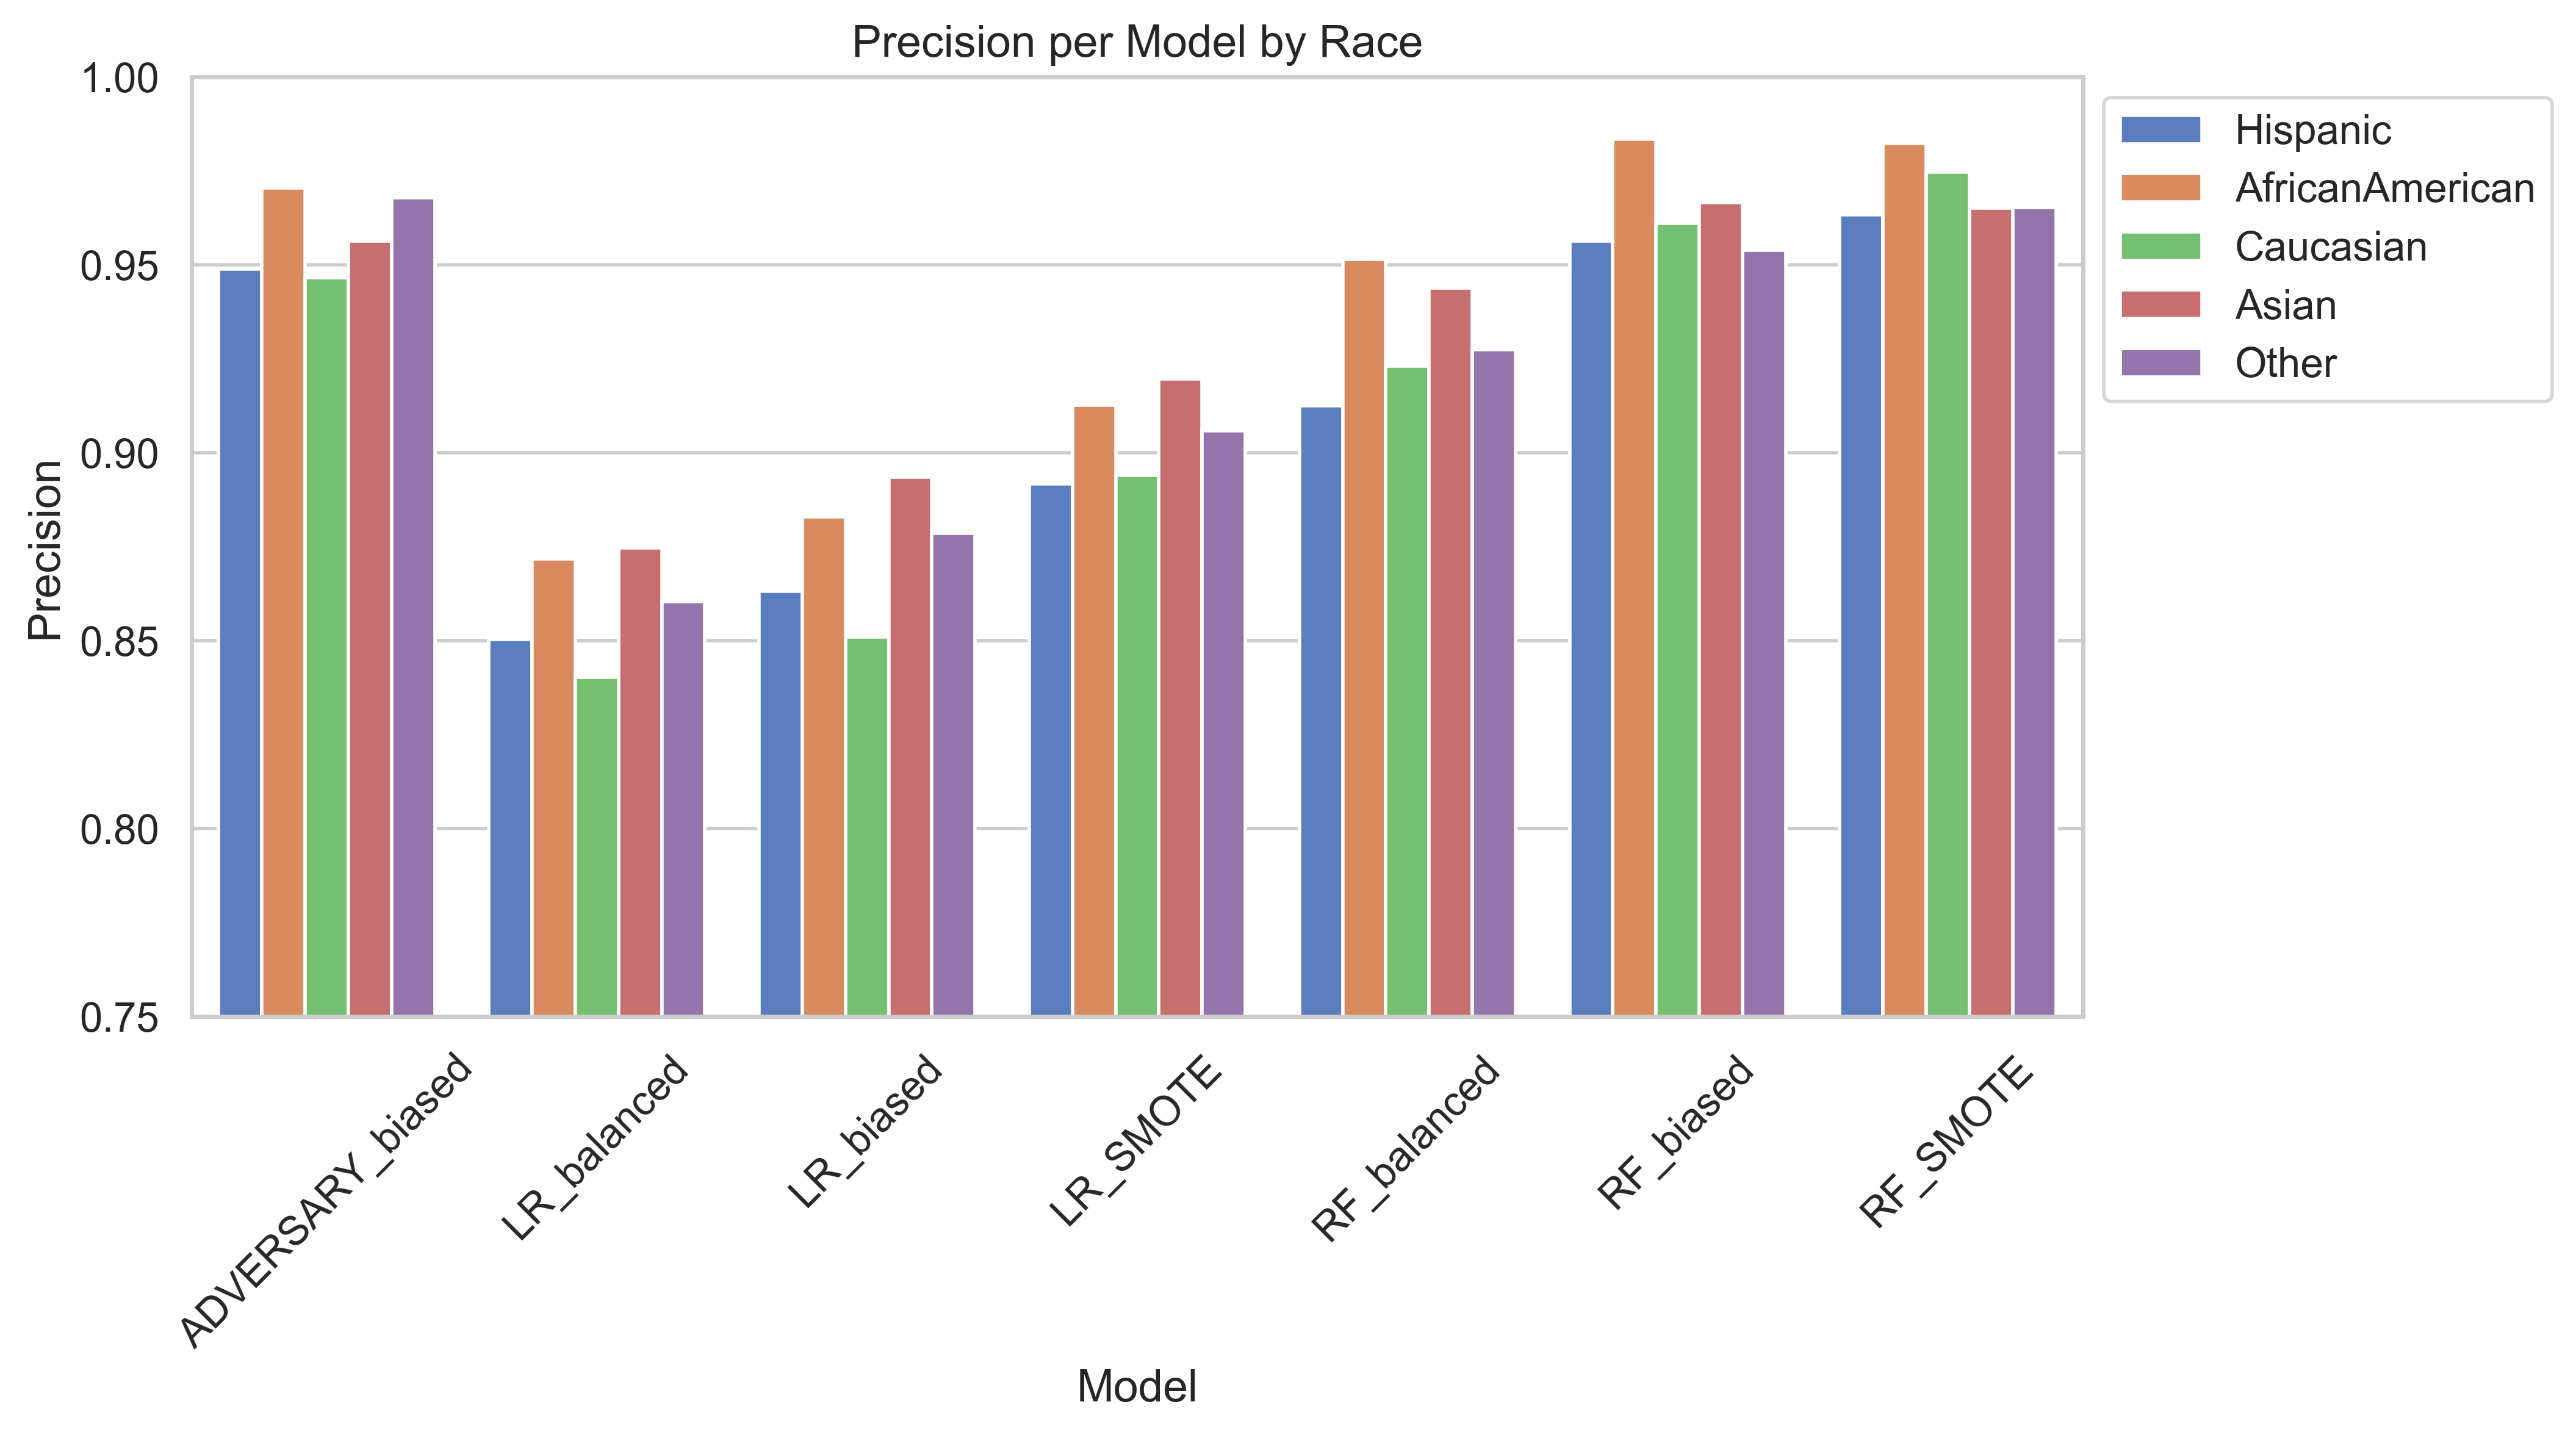

In [17]:
# 2. Precision
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="Precision", hue="Race")
plt.title("Precision per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.75, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

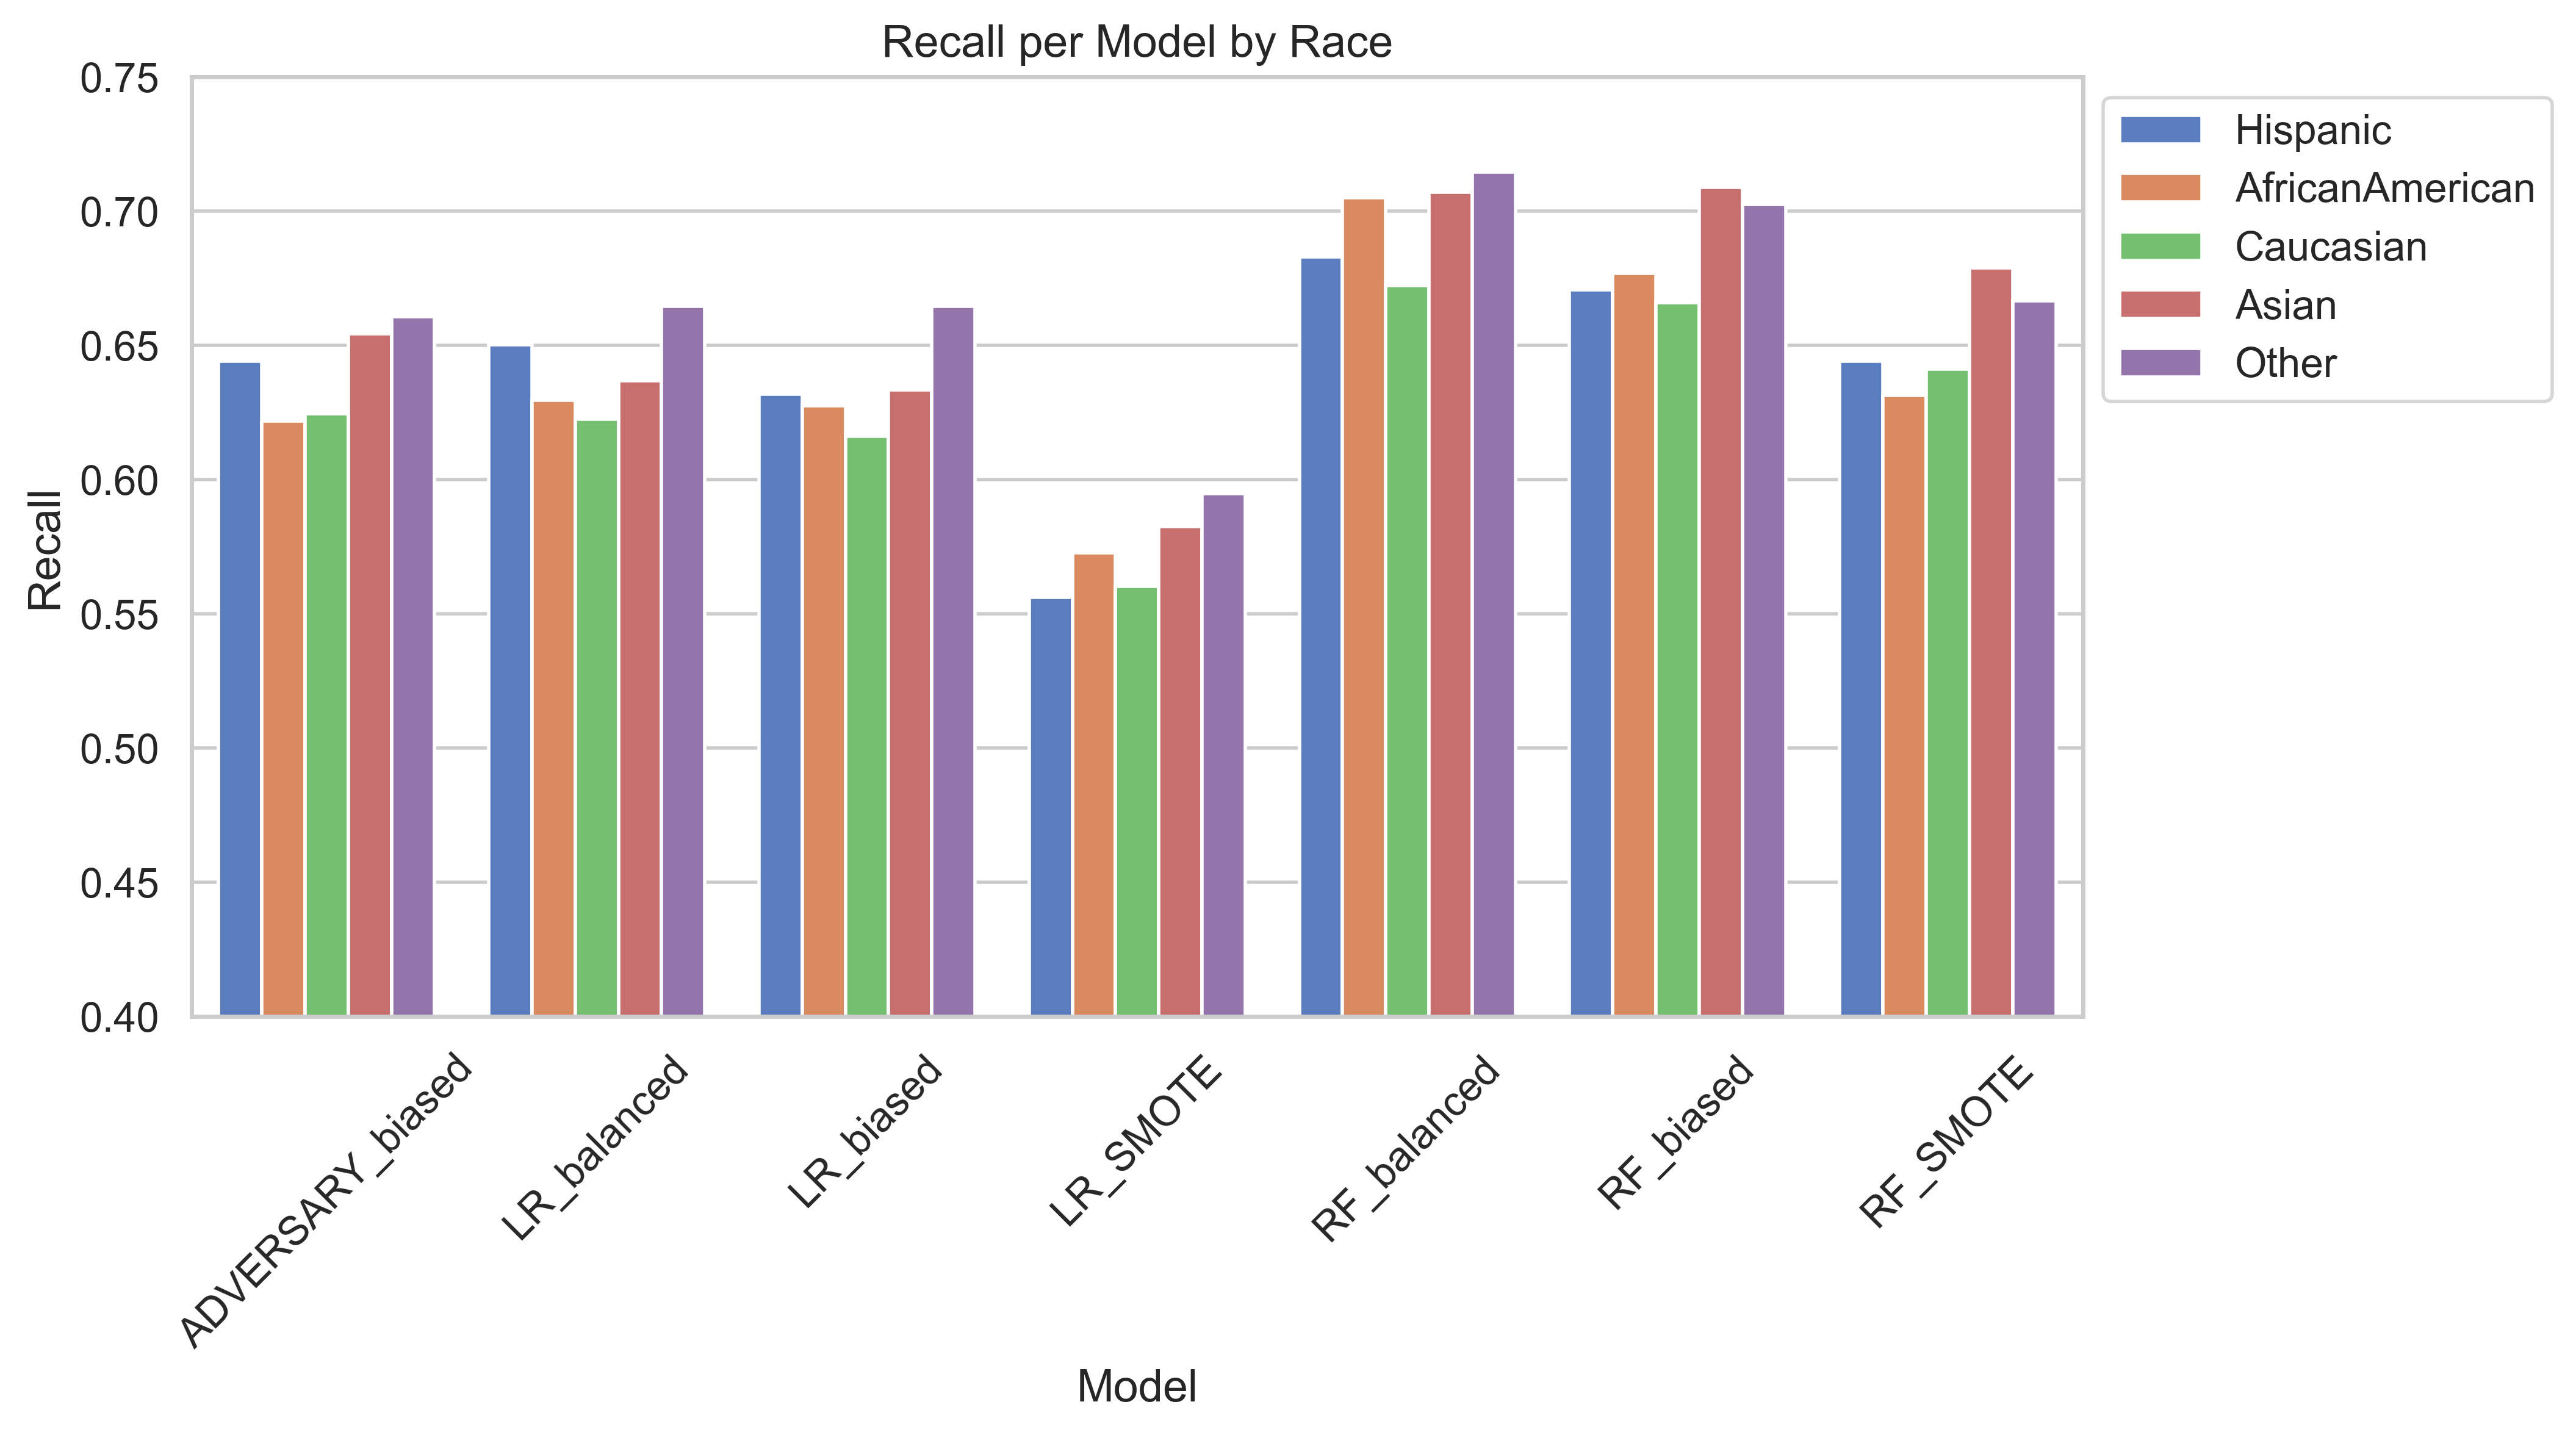

In [16]:
# 3. Recall
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="Recall", hue="Race")
plt.title("Recall per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.4,0.75)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

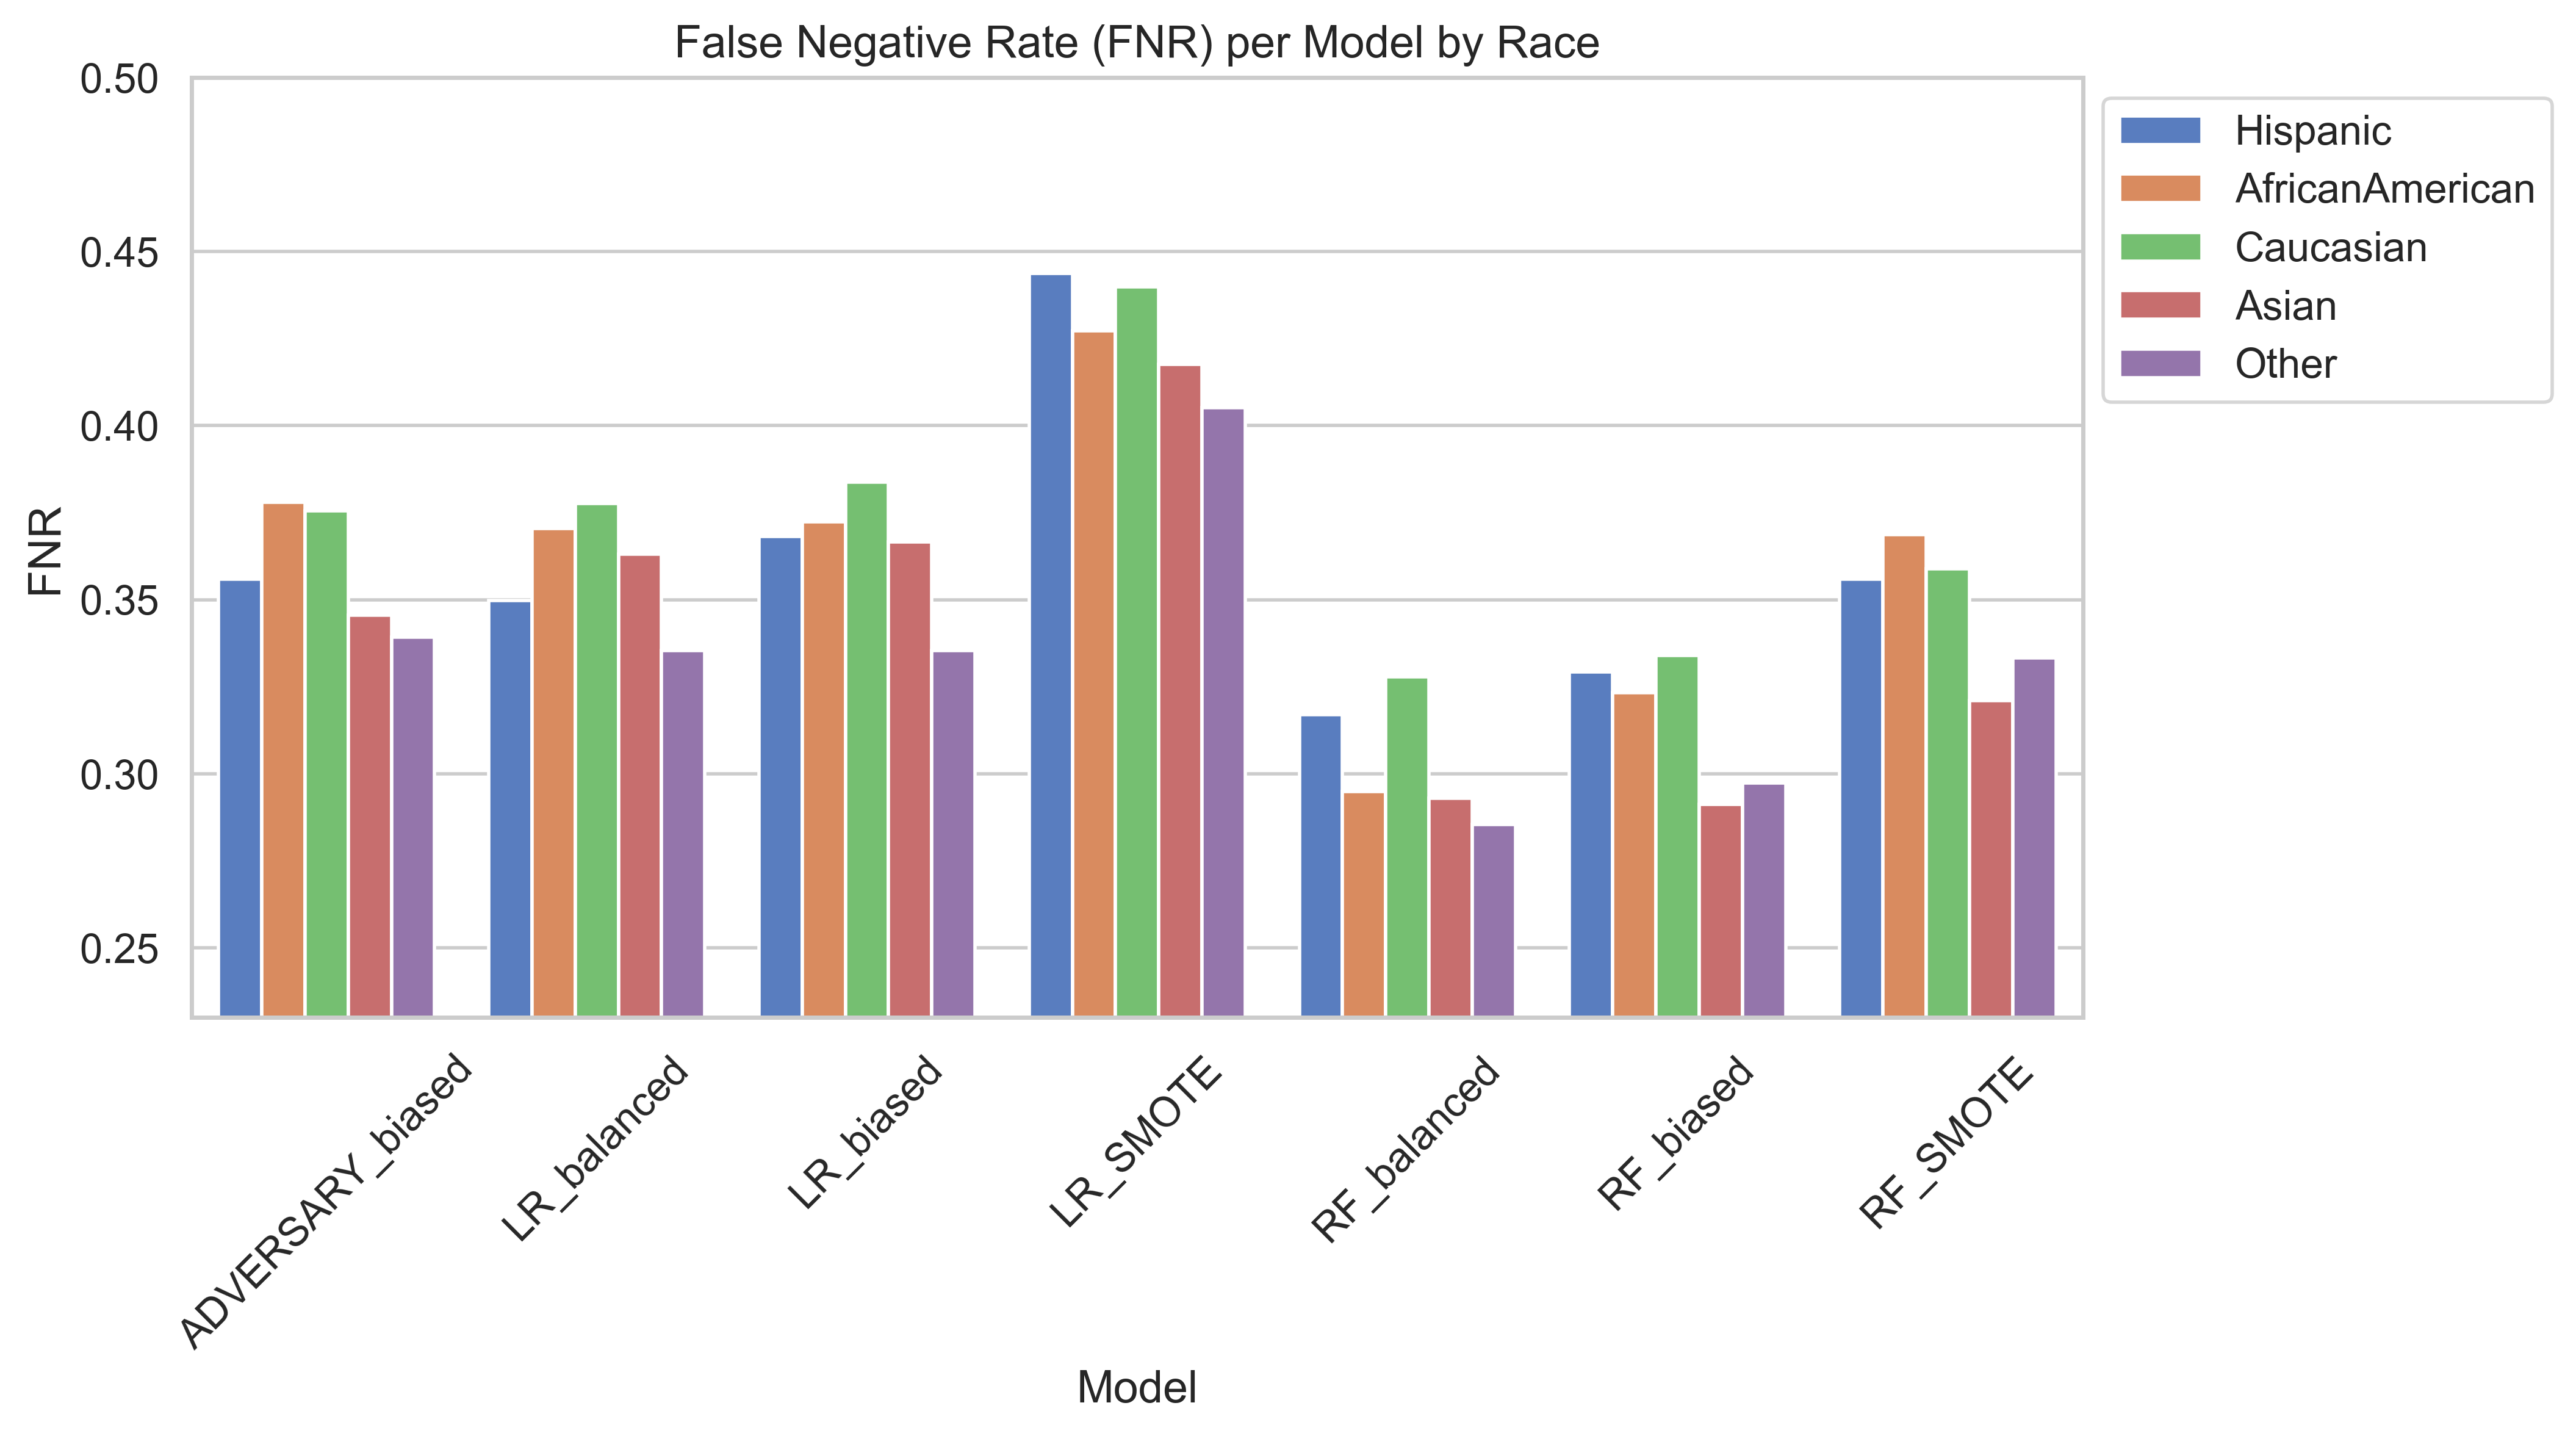

In [15]:
# 4. FNR Parity
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df, x="Model", y="FNR", hue="Race")
plt.title("False Negative Rate (FNR) per Model by Race")
plt.xticks(rotation=45)
plt.ylim(0.23,0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

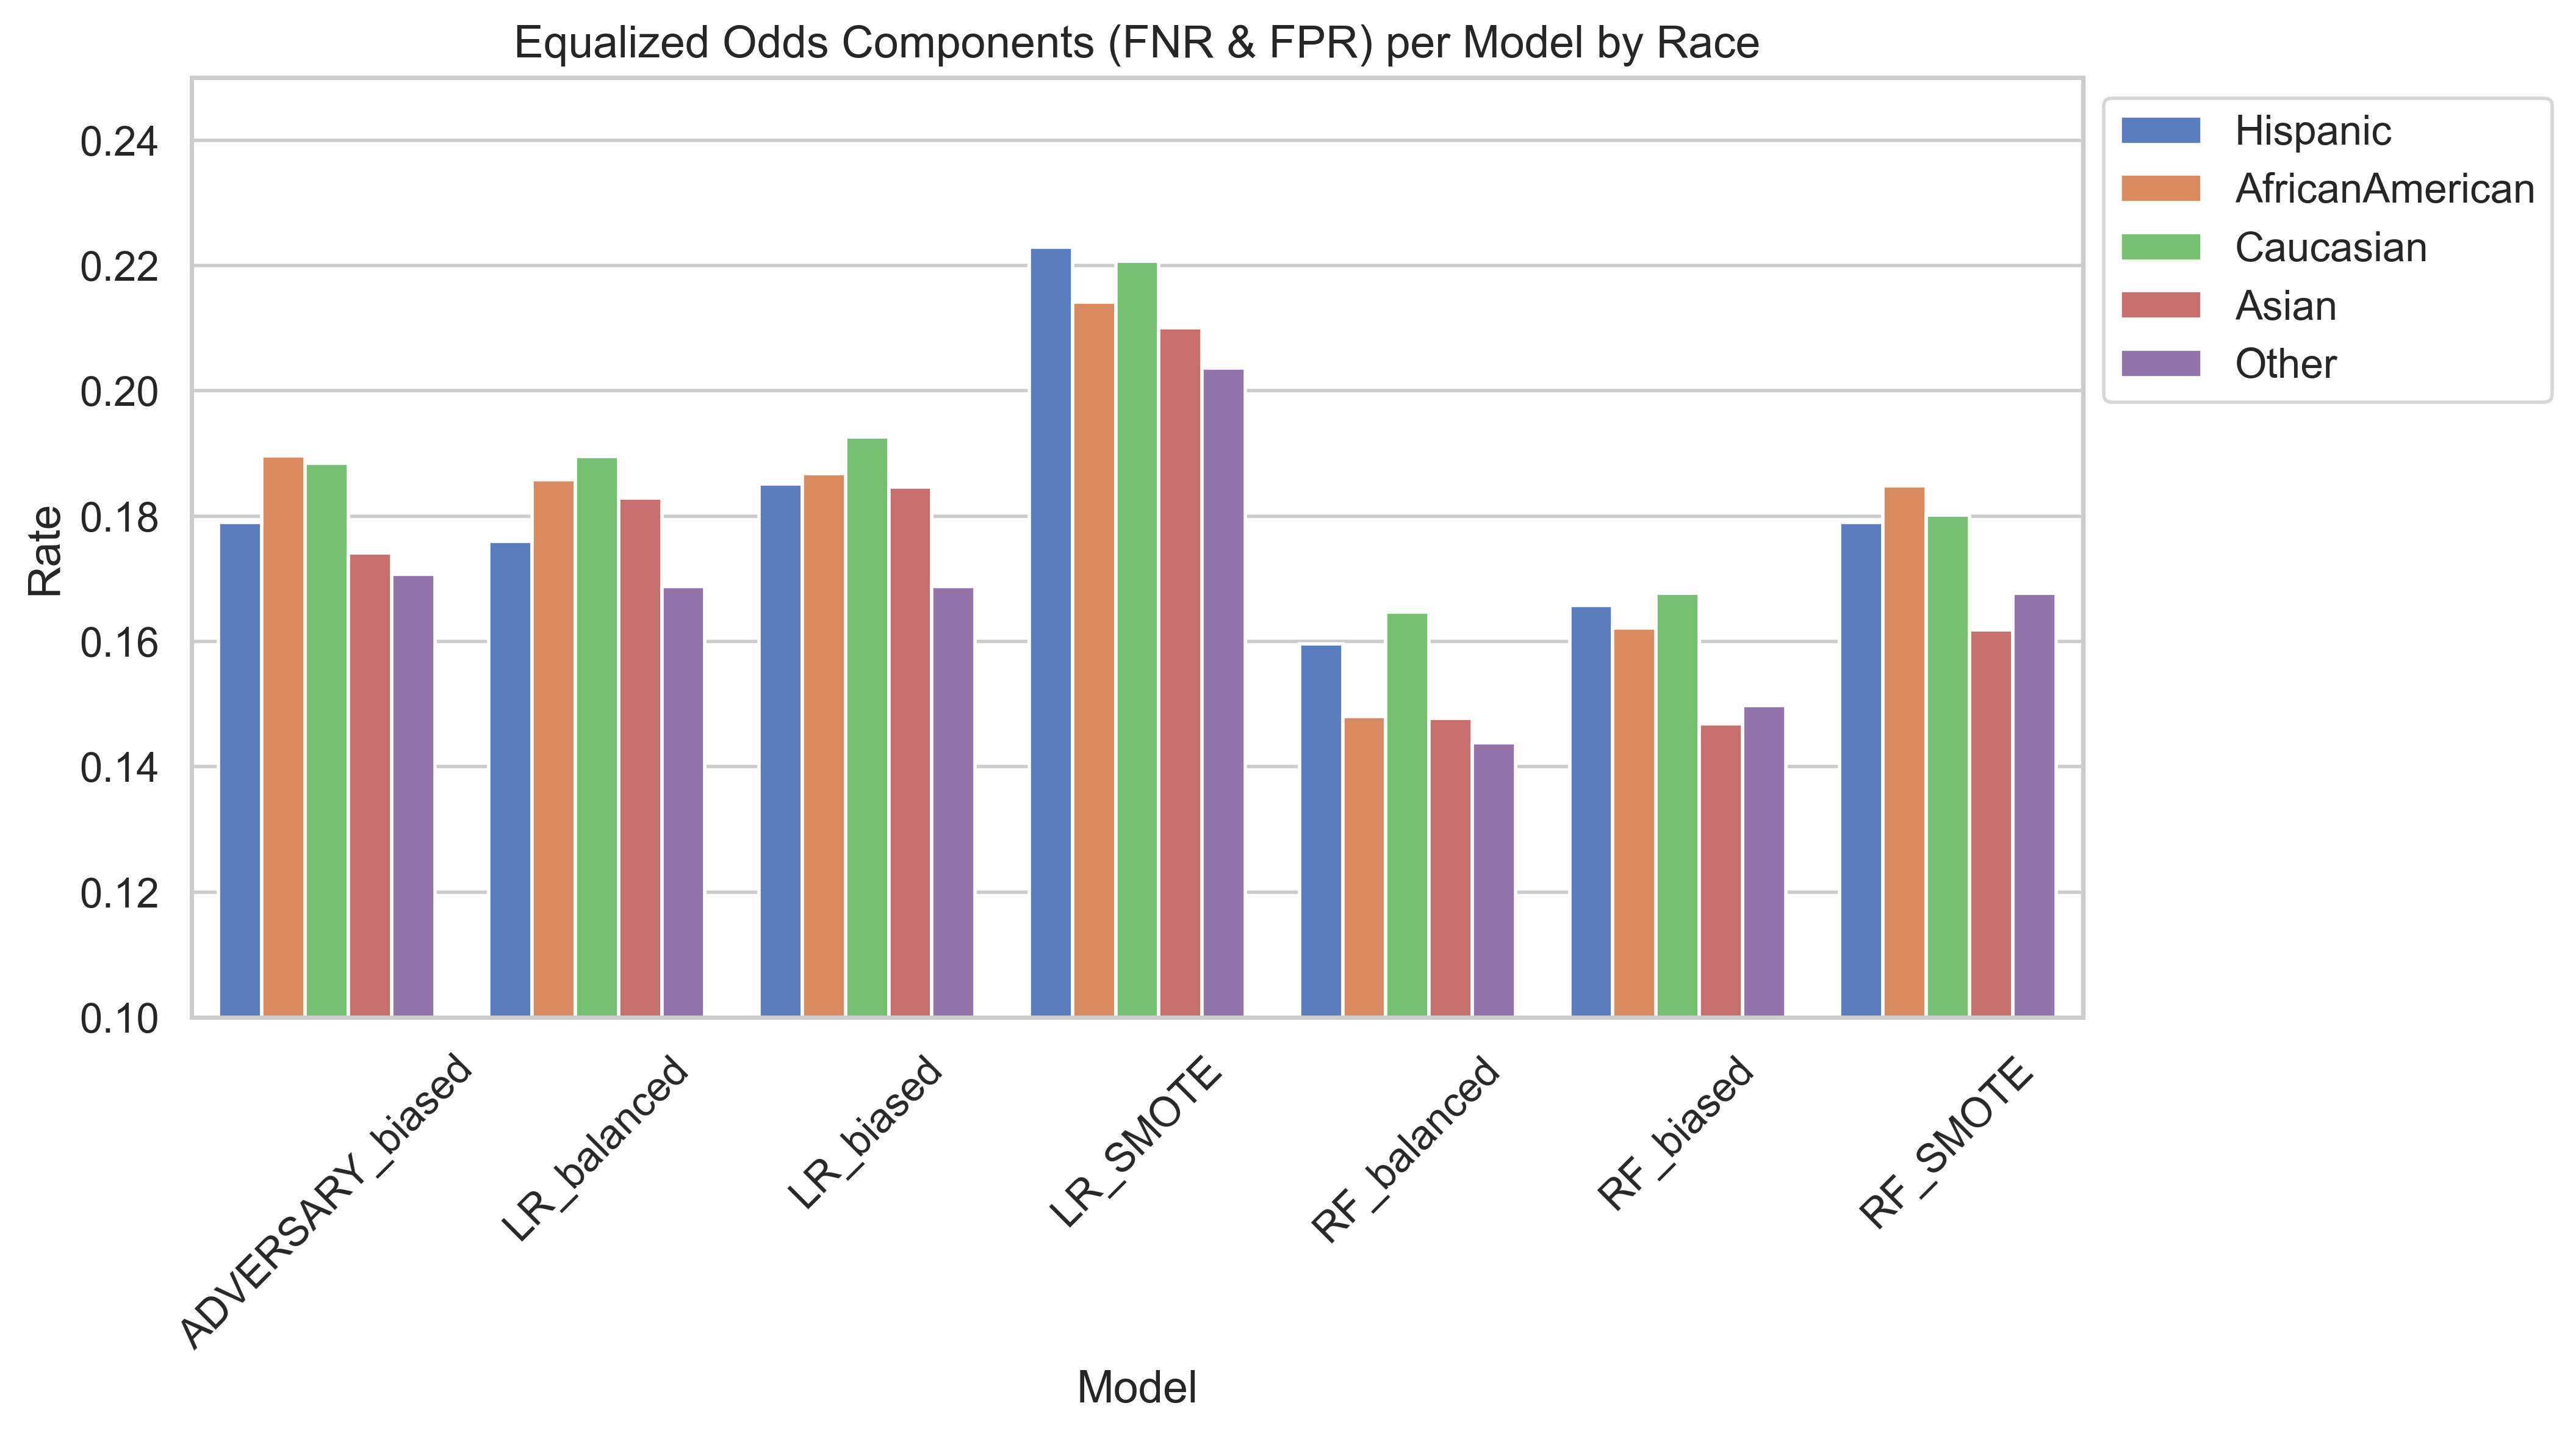

In [14]:
# 5. Equalized Odds
# Equalized odds: difference in TPR and FPR between races (here simplified as FNR parity & FPR parity)
# FPR computation
def fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) > 0 else np.nan

metrics_df['FPR'] = metrics_df.apply(lambda row: fpr(
    df[df['race']==row['Race']]['True_Label'], df[df['race']==row['Race']]['Predicted_Label']
), axis=1)

plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=metrics_df.melt(id_vars=['Model','Race'], value_vars=['FNR','FPR']),
            x='Model', y='value', hue='Race', ci=None)
plt.title("Equalized Odds Components (FNR & FPR) per Model by Race")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.ylim(0.1,0.25)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

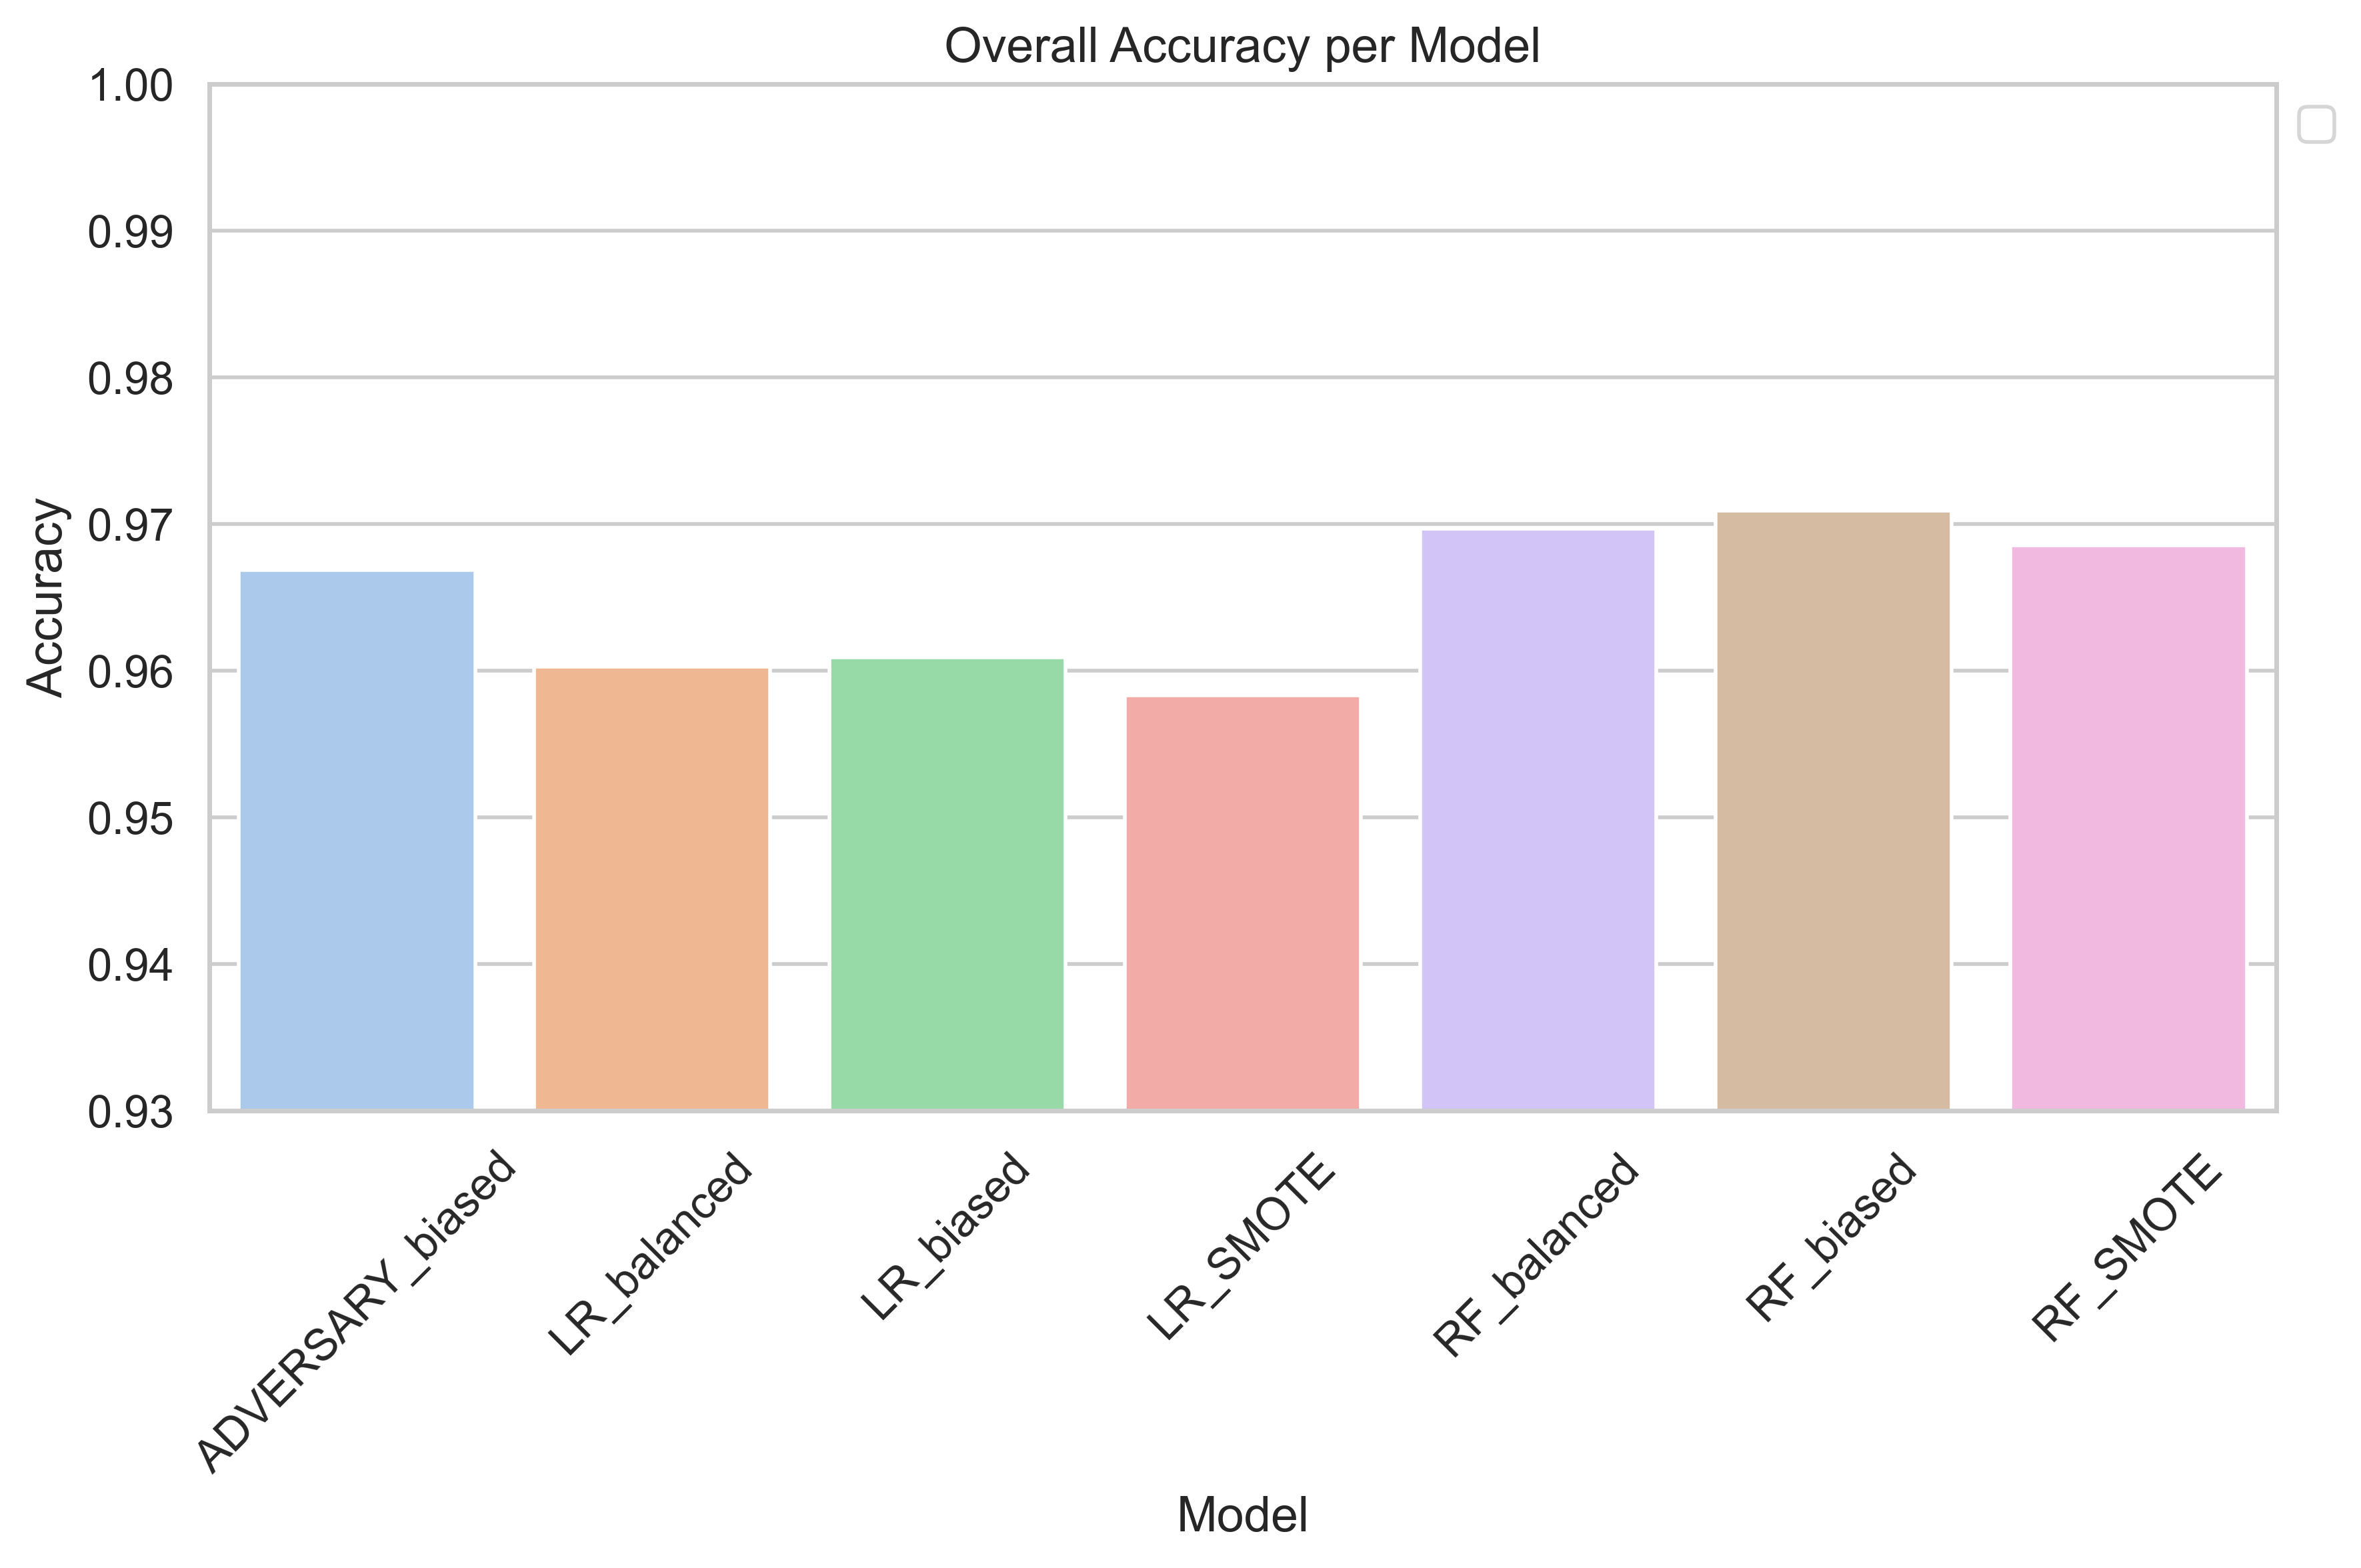

In [11]:
# Compute accuracy per model
accuracy_list = []

for model_name, path in files.items():
    df = pd.read_csv(path)
    y_true = df['True_Label']
    y_pred = df['Predicted_Label']
    acc = (y_true == y_pred).mean()
    accuracy_list.append({"Model": model_name, "Accuracy": acc})

accuracy_df = pd.DataFrame(accuracy_list)

# Plot
plt.figure(figsize=(10,5),dpi=400)
sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="pastel")
plt.title("Overall Accuracy per Model")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0.93, 1)
plt.show()
